In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Display the first five rows
df_student = pd.read_csv('StudentPerformanceFact.csv')
df_student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [13]:
# Generate summary statistics for numerical columns and round up to 2 decimal places
df_student.describe().round(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00
mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
std,5.99,11.55,1.47,14.40,1.23,1.03,3.89
min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
25%,16.00,70.00,6.00,63.00,1.00,2.00,65.00
50%,20.00,80.00,7.00,75.00,1.00,3.00,67.00
75%,24.00,90.00,8.00,88.00,2.00,4.00,69.00
max,44.00,100.00,10.00,100.00,8.00,6.00,101.00


In [15]:
# Display a summary of the DataFrame including column names, non-null counts, and data types
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [17]:
# Check for missing values in each column by counting the number of null entries
df_student.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [19]:
# Remove any rows with missing values
df_student.dropna(inplace=True)

In [67]:
df_student.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [69]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [29]:
# Calculate the correlation matrix for numerical columns only
df_student.corr(numeric_only=True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183,0.445104
Attendance,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976,0.580259
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898,-0.017171
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694,0.174283
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325,0.156829
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000,0.025148
Exam_Score,0.445104,0.580259,-0.017171,0.174283,0.156829,0.025148,1.000000


In [45]:
def plot_scatter(hours,exam):
    '''
    plot the scatter graph of hours against exam
    '''
    plt.figure(dpi=144, figsize =(4, 3.5))

    # scatter plot
    plt.scatter(hours, exam,color='blue', marker='*', s=8, label='Exam Score', alpha=0.6)

    # formatting
    # add axis labels
    plt.xlabel('Hours studied',labelpad=16,fontsize=14)
    plt.ylabel('Exam score', labelpad=16,fontsize=14)
    plt.legend(loc='upper right')
    plt.show()
    return

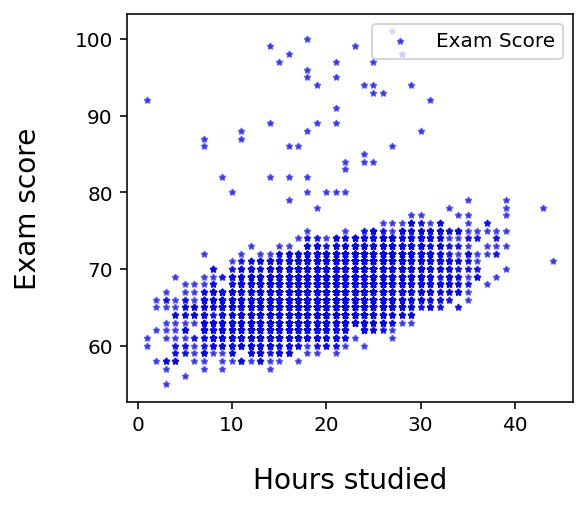

In [47]:
plot_scatter(df_student['Hours_Studied'],df_student['Exam_Score'])

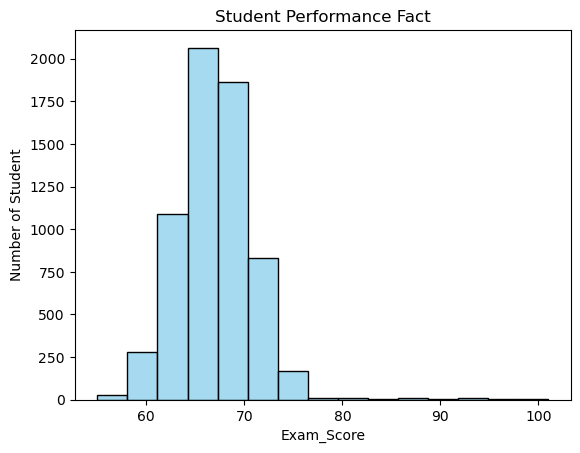

In [75]:
# Plot histogram
sns.histplot(df_student['Exam_Score'], bins=15, color='skyblue', edgecolor='black')

# Add axis labels
plt.xlabel('Exam_Score')
plt.ylabel('Number of Student')
plt.title('Student Performance Fact')
plt.show()

In [63]:
def plot_student_correlation(df_student, method):
    """
    Plot correlation heat map
    """
    plt.figure(figsize=(6,4), dpi=144)
    
    mask = np.triu(np.ones_like(df_student.corr(numeric_only=True)))
    sns.heatmap(df_student.corr(method='pearson', numeric_only=True), lw=1, annot=True, cmap='RdBu', mask=mask)
    plt.title("Correlation heat map")
    plt.show()

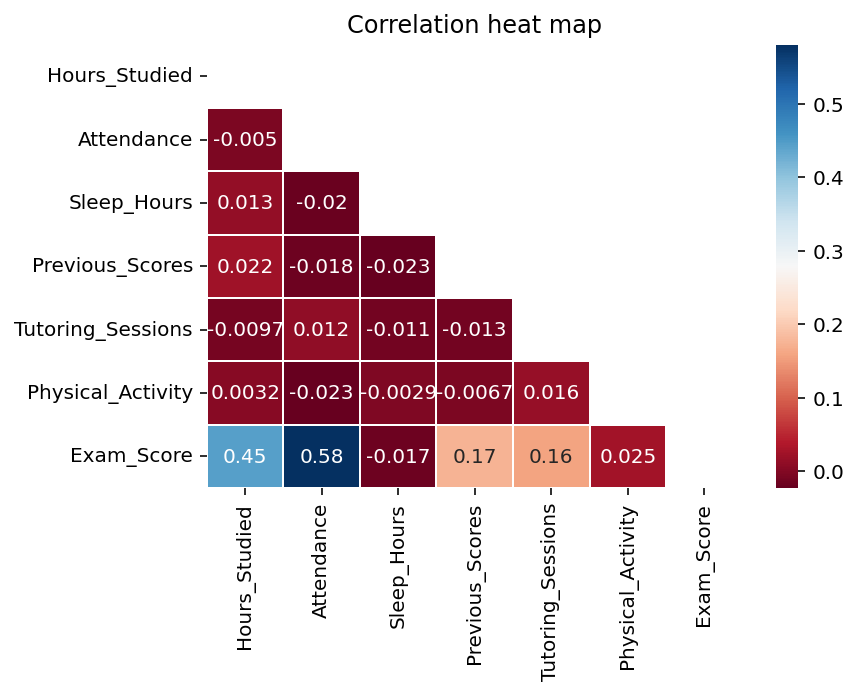

In [65]:
plot_student_correlation(df_student, 'pearson')